> #### Setup  

> Before running data.world notebooks for the first time, you'll need to:  
1. Install data.world's Python package, including optional `pandas` dependencies: 
```shell
pip install git+git://github.com/datadotworld/data.world-py.git#egg=project[pandas]
```
1. Obtain an API access token at https://data.world/settings/advanced
1. Store API access token using the `dw` command-line tool: 
```shell
dw configure
```

> Once your environment is set up, these steps do not need to be repeated for other data.world notebooks.

In [1]:
import datadotworld as dw
import charts_function_list
import os
import math

In [2]:
base_, data, outputs = charts_function_list.folder_setup()

In [3]:
# Datasets are referenced by their path
dataset_key = 'len/intelligence-of-dogs'

# Or simply by their URL
dataset_key = 'https://data.world/len/intelligence-of-dogs'

In [4]:
# Load dataset (onto the local file system)
dogs = dw.load_dataset(dataset_key)  # cached under ~/.dw/cache

In [115]:
dog_frame = pd.DataFrame(dogs.tables['dog_intelligence']) #create data frame from dog intelligence table
dog_frame.index = dog_frame.index+1 #add one to index
dog_frame.fillna({'obey':.25},inplace=True)#data source suggests the NA should be .25. Fill with that
dog_frame['obey']=dog_frame['obey'].astype('float')

In [124]:
terriers = dog_frame[(dog_frame['breed'].str.lower().str.contains('terrier'))|(dog_frame['breed']=='Miniature Schnauzer')]

In [211]:
dog_frame.columns

Index(['breed', 'classification', 'obey', 'reps_lower', 'reps_upper'], dtype='object')

In [252]:
classifications = np.delete(dog_frame['classification'].unique(),-1)

array(['Brightest Dogs', 'Excellent Working Dogs',
       'Above Average Working Dogs',
       'Average Working/Obedience Intelligence',
       'Fair Working/Obedience Intelligence'], dtype=object)

In [249]:
classifications[-1]

'Lowest Degree of Working/Obedience Intelligence'

In [280]:
dog_chart = charts_function_list.chart_maker(title ='Dog Intelligence: Terriers vs Other Dog Groups')

In [273]:
terrier_color = '#f03b20'
alt_font = 'Futura Bk BT'

def dog_bars(df,color,zorder=1,alpha=.9):
    return ax.bar(left = df.index+.5,bottom = df.reps_lower,height=(df.reps_upper-df.reps_lower),alpha=alpha,width=.5,color=color,edgecolor='white',linewidth=.1,zorder=zorder,clip_on=False)

def obey_label(category,string_piece = 'better',adjustment_factor=0 ):
    by_classification = dog_frame[dog_frame['classification']==category]
    x_pos =  np.mean([by_classification.index.max(),by_classification.index.min()])
    y_pos = (by_classification['reps_lower'].min()-1.5)+adjustment_factor
    label = 'Obey first command\n'+str(int((by_classification['obey'].min()*100)))+'% of the time or '+string_piece
    return ax.text(x_pos,y_pos,label,ha='center',va='center',fontname='Futura Md BT',color='#3182bd')

classifications = np.delete(dog_frame['classification'].unique(),-1) #la

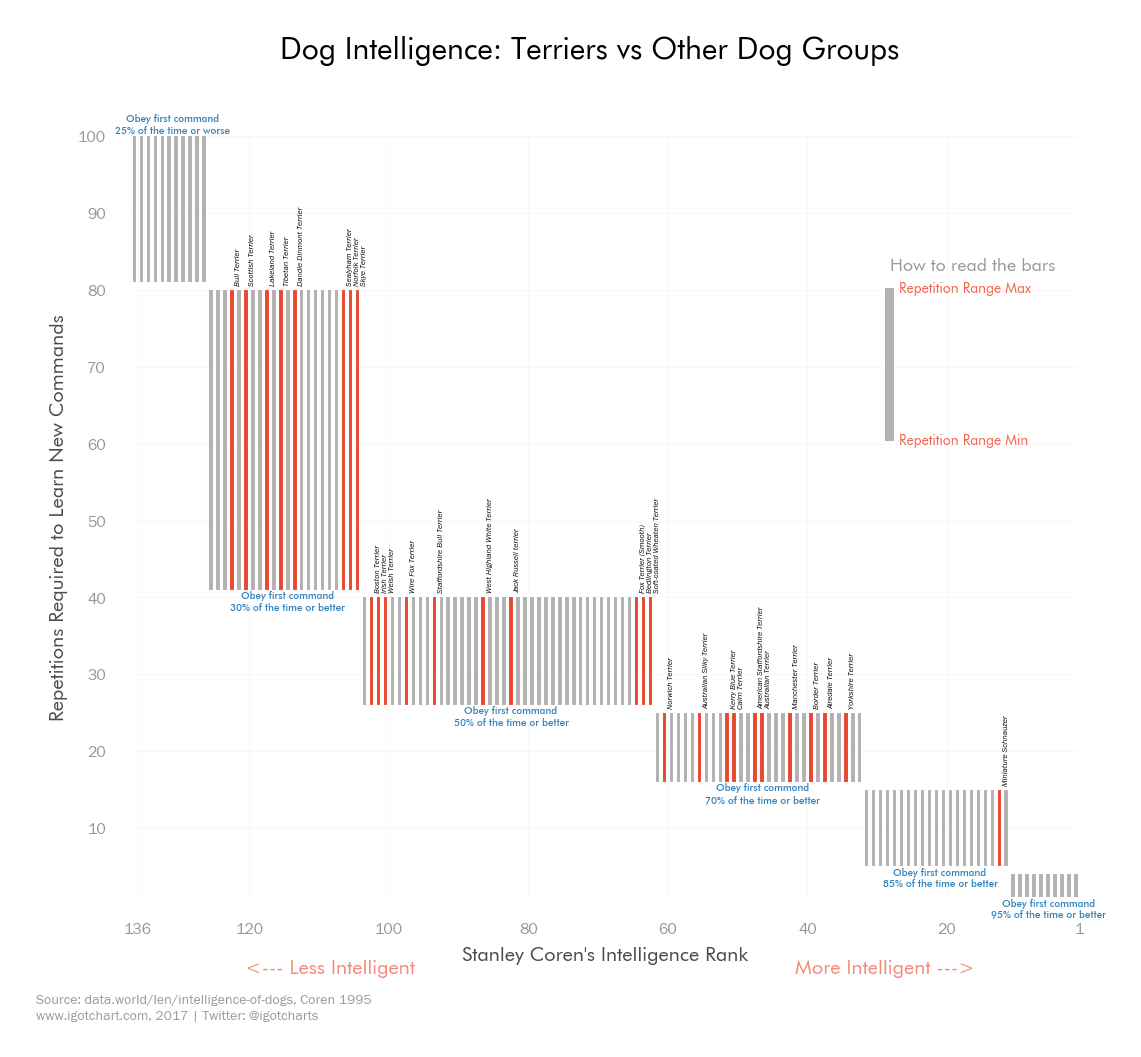

In [282]:
os.chdir(outputs)
fig = dog_chart.initial_fig_axis(figsize=(17,14))
fig.suptitle(dog_chart.title,fontsize=30,fontname='Futura Bk BT')
ax = dog_chart.axes_set_up(fig)
dog_bars(dog_frame,'grey',alpha=.6)

dog_bars(terriers,terrier_color)

for item in terriers.index:
    ax.text(item,terriers.loc[item]['reps_upper']+.6,terriers.loc[item]['breed'],rotation=90,va='bottom',ha='left',style='italic',fontsize=8)


ax.set_xticks([1]+[(20*x) for x in range (1,math.ceil(len(dog_frame)/20))]+[len(dog_frame)])
ax.set_xlim(1,137)
ax.set_ylabel('Repetitions Required to Learn New Commands',fontname = 'Futura Bk BT',fontsize=20,alpha=.7)
ax.set_xlabel('Stanley Coren\'s Intelligence Rank',fontname = alt_font,fontsize=20,alpha=.7)
ax.invert_xaxis()
ax.text(.3,-.1,'<--- Less Intelligent',transform=ax.transAxes,fontname = alt_font,fontsize=20,alpha=.6,ha='right',color='#f03b20')
ax.text(.7,-.1,'More Intelligent --->',transform=ax.transAxes,fontname = alt_font,fontsize=20,alpha=.6,ha='left',color='#f03b20')
dog_chart.tick_params_(ax)
dog_chart.y_axis_setup(ax,1,100,interval=10)
ax.tick_params(axis='both',pad=25)
#legend
ax.text(.8,.83,'How to read the bars', transform=ax.transAxes,color='grey',alpha=.8,va='center',fontsize=18,fontname = alt_font)
ax.bar(left=.8,bottom=.6,height=.2, transform=ax.transAxes,width=.01,color='grey',alpha=.6)
ax.text(.81,.6,'Repetition Range Min', transform=ax.transAxes,color=terrier_color,alpha=.8,va='center',fontsize=14,fontname = alt_font)
ax.text(.81,.8,'Repetition Range Max', transform=ax.transAxes,color=terrier_color,alpha=.8,va='center',fontsize=14,fontname = alt_font)
for item in classifications:
    obey_label(item)
obey_label('Lowest Degree of Working/Obedience Intelligence','worse',adjustment_factor=22)
dog_chart.citations(ax,x=-.1,source_y=-.14,chart_tag_y=-.16,source = 'Source: data.world/len/intelligence-of-dogs, Coren 1995',chart_tag='www.igotchart.com, 2017 | Twitter: @igotcharts')
charts_function_list.chart_save('dog_intelligence',dpi=300)
plt.show()

In [156]:
import matplotlib.font_manager


set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

{'AR BERKLEY',
 'AR BLANCA',
 'AR BONNIE',
 'AR CARTER',
 'AR CENA',
 'AR CHRISTY',
 'AR DARLING',
 'AR DECODE',
 'AR DELANEY',
 'AR DESTINE',
 'AR ESSENCE',
 'AR HERMANN',
 'AR JULIAN',
 'Adventure',
 'Agency FB',
 'Algerian',
 'Arial',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Baskerville Old Face',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Curlz MT',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Ser

In [ ]:
#sql method
dog_frame = dw.query(dataset_key, 'SELECT * FROM dog_intelligence').dataframe